# The Tutorial of Paul et al (2015) for [desc](https://eleozzr.github.io/desc)
- The reproducible of DESC for Paul's data
- This note aims to test DESC under tensorflow >=2.0

In [1]:
# run under my `pytest` environment

In [2]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy.api as sc                                                                                 
from time import time                                                       
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
sc.settings.set_figure_params(dpi=300)

/home/xiaoxiang/.local/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/xiaoxiang/anaconda3/envs/pytest/lib/python3.6/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [3]:
print(sys.version)

3.6.7 | packaged by conda-forge | (default, Nov  6 2019, 16:19:42) 
[GCC 7.3.0]


In [4]:
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.17.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [5]:
desc.__version__

'2.1.1'

In [6]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [7]:
#we have downloaded this data, if not, the following will download data automatically
adata=sc.datasets.paul15()
adata.obs['celltype']=adata.obs['paul15_clusters'].str.split("[0-9]{1,2}", n = 1, expand = True).values[:,1]
adata.obs['celltype2']=adata.obs['paul15_clusters']

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [8]:
sc.pp.log1p(adata)
#sc.pp.filter_genes_dispersion(adata,n_top_genes=1000) #older scanpy
sc.pp.highly_variable_genes(adata,n_top_genes=1000,subset=True,inplace=True)

In [9]:
adata

AnnData object with n_obs × n_vars = 2730 × 999
    obs: 'paul15_clusters', 'celltype', 'celltype2'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'iroot', 'log1p'

In [10]:
sc.pp.scale(adata,max_value=6)# if the the dataset has two or more batches you can use `adata=desc.scale(adata,groupby="BatchID")`
save_dir="paul_result_2"
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.8,1.0],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=True,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=1, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=False) #if do_uamp is False, it will don't compute umap coordiate

Start to process resolution= 0.8
The number of cpu in your computer is 12

Create the directory:paul_result_2 to save result
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Train on 2730 samples
Epoch 1/50
2730/2730 [==============================] - 0s 85us/sample - loss: 1.0304
Epoch 2/50
2730/2730 [==============================] - 0s 26us/sample - loss: 0.9944
Epoch 3/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.9403
Epoch 4/50
2730/2730 [==============================] - 0s 26us/sample - loss: 0.8716
Epoch 5/50
2730/2730 [==============================] - 0s 26us/sample - loss: 0.8297
Epoch 6/50
2730/2730 [==============================] - 0s 26us/sample - loss: 0.8056
Epoch 7/50
2730/2730 [==============================] - 0s 28us/sample - loss: 0.7846
Epoch 8/50
2730/2730 [==============================] - 0s 25us/sample - loss: 0.7677
Epoch 9/50
2730/2730 [==============================] - 0s 

2730/2730 [==============================] - 0s 24us/sample - loss: 0.6709
Epoch 40/50
2730/2730 [==============================] - 0s 23us/sample - loss: 0.6706
Epoch 41/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6711
Epoch 42/50
2730/2730 [==============================] - 0s 25us/sample - loss: 0.6713
Epoch 43/50
2730/2730 [==============================] - 0s 25us/sample - loss: 0.6702
Epoch 44/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6700
Epoch 45/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6707
Epoch 46/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6705
Epoch 47/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6703
Epoch 48/50
2730/2730 [==============================] - 0s 24us/sample - loss: 0.6704
Epoch 49/50
2730/2730 [==============================] - 0s 25us/sample - loss: 0.6702
Epoch 50/50
2730/2730 [==============================] 

2730/2730 [==============================] - 0s 6us/sample - loss: 0.3010
Epoch 14/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2911
Epoch 15/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2951
Epoch 16/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2955
Epoch 17/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2984
Epoch 18/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2933
Epoch 19/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2959
Epoch 20/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2918
Epoch 21/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2944
Epoch 22/50
2730/2730 [==============================] - 0s 5us/sample - loss: 0.2943
Epoch 23/50
2730/2730 [==============================] - 0s 6us/sample - loss: 0.2996
Epoch 24/50
2730/2730 [==============================] - 0s 6us/sa

2730/2730 [==============================] - 0s 17us/sample - loss: 0.6201
Epoch 7/50
2730/2730 [==============================] - 0s 19us/sample - loss: 0.6200
Epoch 8/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6200
Epoch 9/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6200
Epoch 10/50
2730/2730 [==============================] - 0s 17us/sample - loss: 0.6199
Epoch 11/50
2730/2730 [==============================] - 0s 19us/sample - loss: 0.6199
Epoch 12/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6199
Epoch 13/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6198
Epoch 14/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6198
Epoch 15/50
2730/2730 [==============================] - 0s 17us/sample - loss: 0.6198
Epoch 16/50
2730/2730 [==============================] - 0s 18us/sample - loss: 0.6197
Epoch 17/50
2730/2730 [==============================] - 0

2730/2730 [==============================] - 0s 90us/sample - loss: 0.0611
Epoch 2/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0551
Epoch 3/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0499
Epoch 4/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0463
Epoch 5/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0436
The value of delta_label of current 2 th iteration is 0.10695970695970695 >= tol 0.005
Train on 2730 samples
Epoch 1/5
2730/2730 [==============================] - 0s 11us/sample - loss: 0.0838
Epoch 2/5
2730/2730 [==============================] - 0s 9us/sample - loss: 0.0784
Epoch 3/5
2730/2730 [==============================] - 0s 11us/sample - loss: 0.0739
Epoch 4/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0705
Epoch 5/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.0676
The value of delta_label of current 3 th iteration i

2730/2730 [==============================] - 0s 12us/sample - loss: 0.1255
Epoch 2/5
2730/2730 [==============================] - 0s 11us/sample - loss: 0.1208
Epoch 3/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1163
Epoch 4/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1122
Epoch 5/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1083
The value of delta_label of current 5 th iteration is 0.03076923076923077 >= tol 0.005
Train on 2730 samples
Epoch 1/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1419
Epoch 2/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1366
Epoch 3/5
2730/2730 [==============================] - 0s 13us/sample - loss: 0.1314
Epoch 4/5
2730/2730 [==============================] - 0s 11us/sample - loss: 0.1266
Epoch 5/5
2730/2730 [==============================] - 0s 12us/sample - loss: 0.1221
The value of delta_label of current 6 th iteration 

In [11]:
#After training from desc, the results have been saved in `save_dir`
#adata=sc.read("paul_result/adata_desc.h5ad")
adata

AnnData object with n_obs × n_vars = 2730 × 999
    obs: 'paul15_clusters', 'celltype', 'celltype2', 'desc_0.8', 'desc_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'iroot', 'log1p', 'prob_matrix0.8', 'prob_matrix1.0'
    obsm: 'X_Embeded_z0.8', 'X_tsne', 'X_tsne0.8', 'X_Embeded_z1.0', 'X_tsne1.0'

1. The meta.data of each cell has been saved in `adata.obs`, 
2. the representation from `desc` of each cell have been saved in `adata.obsm`('X_Embeded_z1.0')
3. The dimension reduction from `desc` of each cell have beed saved in `adata.obsm`('X_tsne1.0')

# Computing maxmum probability

In [12]:
adata.obs['max.prob']=adata.uns["prob_matrix1.0"].max(1)

# t-SNE plots

... storing 'celltype' as categorical


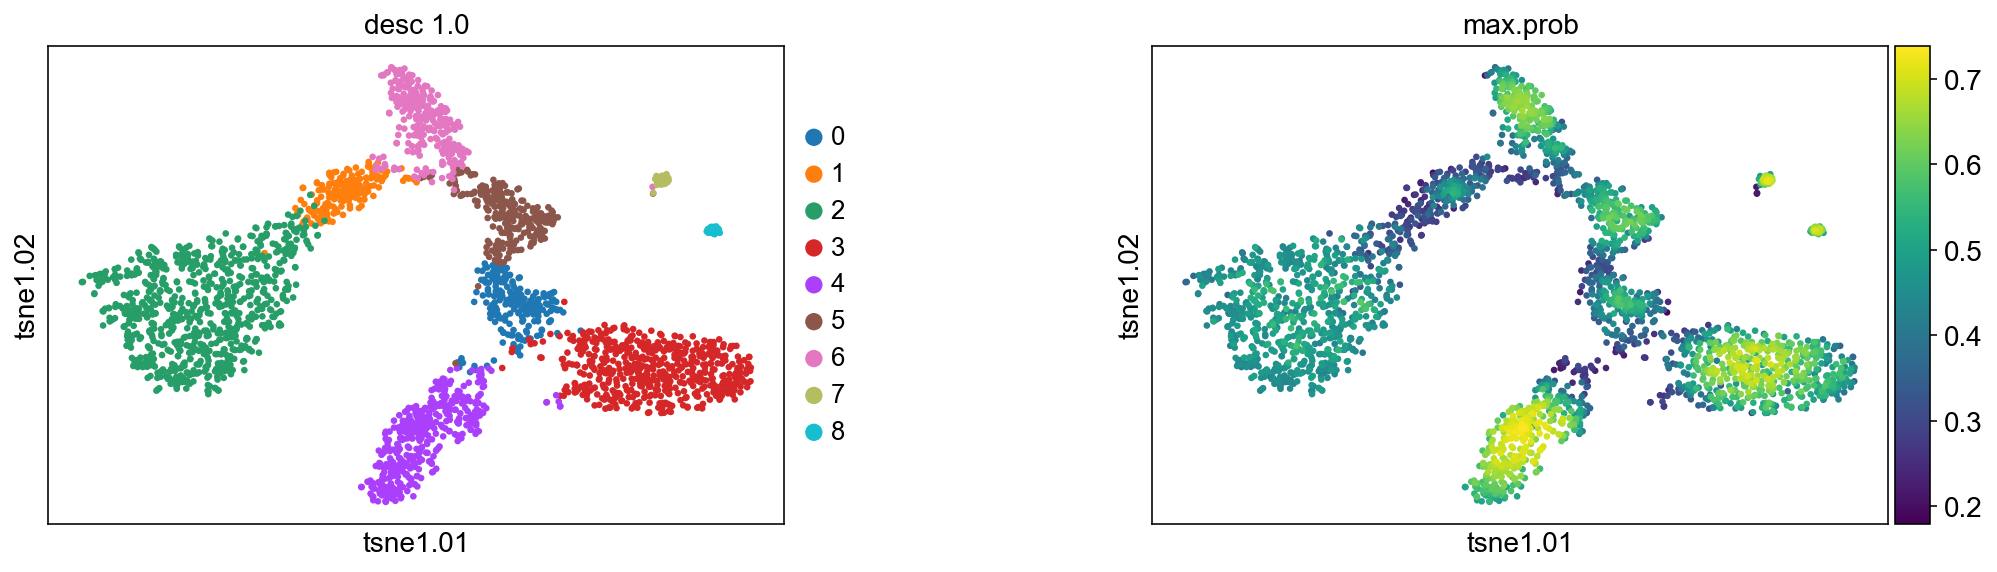

In [13]:
sc.pl.scatter(adata,basis="tsne1.0",color=['desc_1.0','max.prob'])

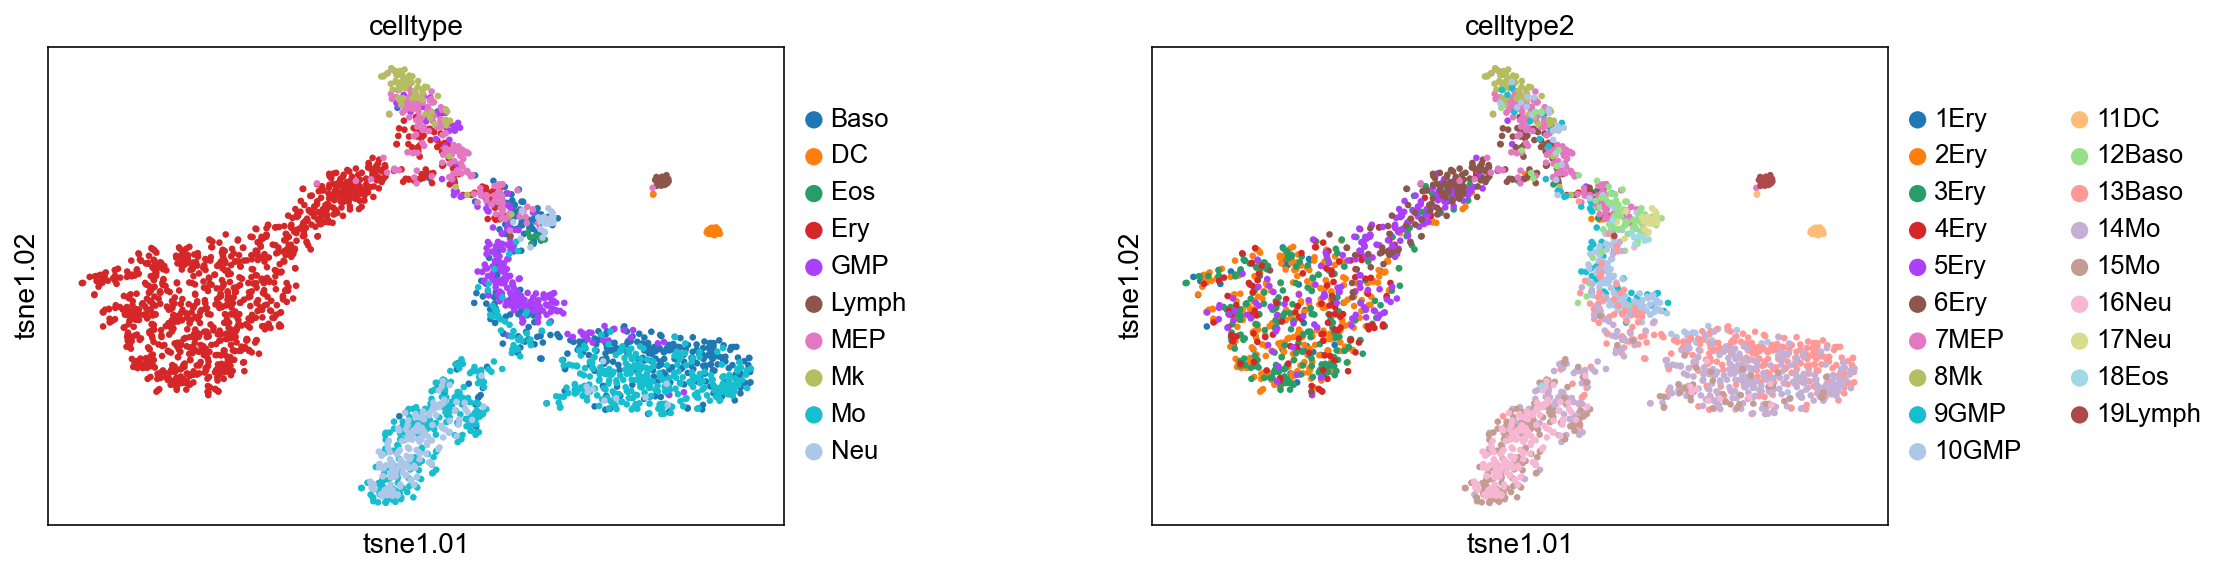

In [14]:
sc.pl.scatter(adata,basis="tsne1.0",color=['celltype','celltype2'])

# reference

1. Paul F, Arkin Y, Giladi A, Jaitin DA et al. Transcriptional heterogeneity and lineage commitment in myeloid progenitors. Cell, 163:1663-167 (2015)
2. Li, X., Wang, K., Lyu, Y. et al. Deep learning enables accurate clustering with batch effect removal in single-cell RNA-seq analysis. Nat Commun 11, 2338 (2020). https://doi.org/10.1038/s41467-020-15851-3.